In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Download the following dataset found at the following link: https://healthdata.gov/dataset/certificate-need-applications-beginning-1974

In [5]:
missing_vals=['9999999','MMM','999','Miss']
dataframe = pd.read_excel('Certificate_of_Need_Applications__Beginning_1974.xls',na_values=missing_vals)

In [6]:
dataframe.head(5)

,CON Project Number,Facility Id,Facility Name,Project Description,Submission Type(s),Facility Type,Total Project Cost,Revision Reason,Project Status,Project Status Date,...,Council Action (10),Council Date (10),Director Action,Director Action Date,ACS Letter Sent Date,PHC Final Approval Letter Sent,Assigned Construction Start Date,Assigned Construction Completion Date,Actual Construction Start Date,Actual Construction Completion Date
0,191053,397.0,Oneida Healthcare,NaN,"Application - Limited Review - Equipment,Appli...",Hospital,2456411.0,NaN,Received,2019-01-31 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,191052,4068.0,Melville Surgery Center,NaN,Notice - Transfer of Ownership Interest,Diagnostic and Treatment Center,NaN,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,191051,409.0,Highland Hospital,NaN,Application - Administrative Review,Hospital,771333.0,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,191050,756.0,Samaritan Hospital,NaN,Application - Limited Review - Minor Construction,Hospital,27600.0,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,191049,1158.0,Soldiers and Sailors Memorial Hospital of Yate...,NaN,Application - Limited Review - Service Delivery,Hospital,500.0,NaN,Received,2019-01-28 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT


## 2- What type of license is this Dataset shared under?

In [ ]:
#Open Data Commons Open Database License (ODbL)

## 3- Omit all rows/observations with missing 'Total Project Cost' information.

In [7]:
dataframe['Total Project Cost'].isnull().sum()

847

In [8]:
filter_Total_Project_Cost=(~dataframe['Total Project Cost'].isnull())
filtered_data=dataframe[filter_Total_Project_Cost]
filtered_data.head(3)

,CON Project Number,Facility Id,Facility Name,Project Description,Submission Type(s),Facility Type,Total Project Cost,Revision Reason,Project Status,Project Status Date,...,Council Action (10),Council Date (10),Director Action,Director Action Date,ACS Letter Sent Date,PHC Final Approval Letter Sent,Assigned Construction Start Date,Assigned Construction Completion Date,Actual Construction Start Date,Actual Construction Completion Date
0,191053,397.0,Oneida Healthcare,NaN,"Application - Limited Review - Equipment,Appli...",Hospital,2456411.0,NaN,Received,2019-01-31 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,191051,409.0,Highland Hospital,NaN,Application - Administrative Review,Hospital,771333.0,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,191050,756.0,Samaritan Hospital,NaN,Application - Limited Review - Minor Construction,Hospital,27600.0,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT


## 4- Filter out the observations for the range of years 2014-2019

In [9]:
filter_1419=(dataframe['Application Received Year']>2013)&(dataframe['Application Received Year']<2020)
filtered_year=dataframe[filter_1419]
filtered_year.iloc[:,12]

0       2019
1       2019
2       2019
3       2019
4       2019
5       2019
6       2019
7       2019
8       2019
9       2019
10      2019
11      2019
12      2019
13      2019
14      2019
15      2019
16      2019
17      2019
18      2019
19      2019
20      2019
21      2019
22      2019
23      2019
24      2019
25      2019
26      2019
27      2019
28      2019
29      2019
        ... 
4124    2014
4125    2014
4126    2014
4127    2014
4128    2014
4129    2014
4130    2014
4131    2014
4132    2014
4133    2014
4134    2014
4135    2014
4136    2014
4137    2014
4138    2014
4139    2014
4140    2014
4141    2014
4142    2014
4143    2014
4144    2014
4145    2014
4146    2014
4147    2014
4148    2014
4149    2014
4150    2014
4151    2014
4152    2014
4153    2014
Name: Application Received Year, Length: 4154, dtype: int64

In [10]:
filtered_year.head(3)

,CON Project Number,Facility Id,Facility Name,Project Description,Submission Type(s),Facility Type,Total Project Cost,Revision Reason,Project Status,Project Status Date,...,Council Action (10),Council Date (10),Director Action,Director Action Date,ACS Letter Sent Date,PHC Final Approval Letter Sent,Assigned Construction Start Date,Assigned Construction Completion Date,Actual Construction Start Date,Actual Construction Completion Date
0,191053,397.0,Oneida Healthcare,NaN,"Application - Limited Review - Equipment,Appli...",Hospital,2456411.0,NaN,Received,2019-01-31 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,191052,4068.0,Melville Surgery Center,NaN,Notice - Transfer of Ownership Interest,Diagnostic and Treatment Center,NaN,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,191051,409.0,Highland Hospital,NaN,Application - Administrative Review,Hospital,771333.0,NaN,Received,2019-01-30 00:00:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT


## 5- Develop an informative plot of total project cost by facility type

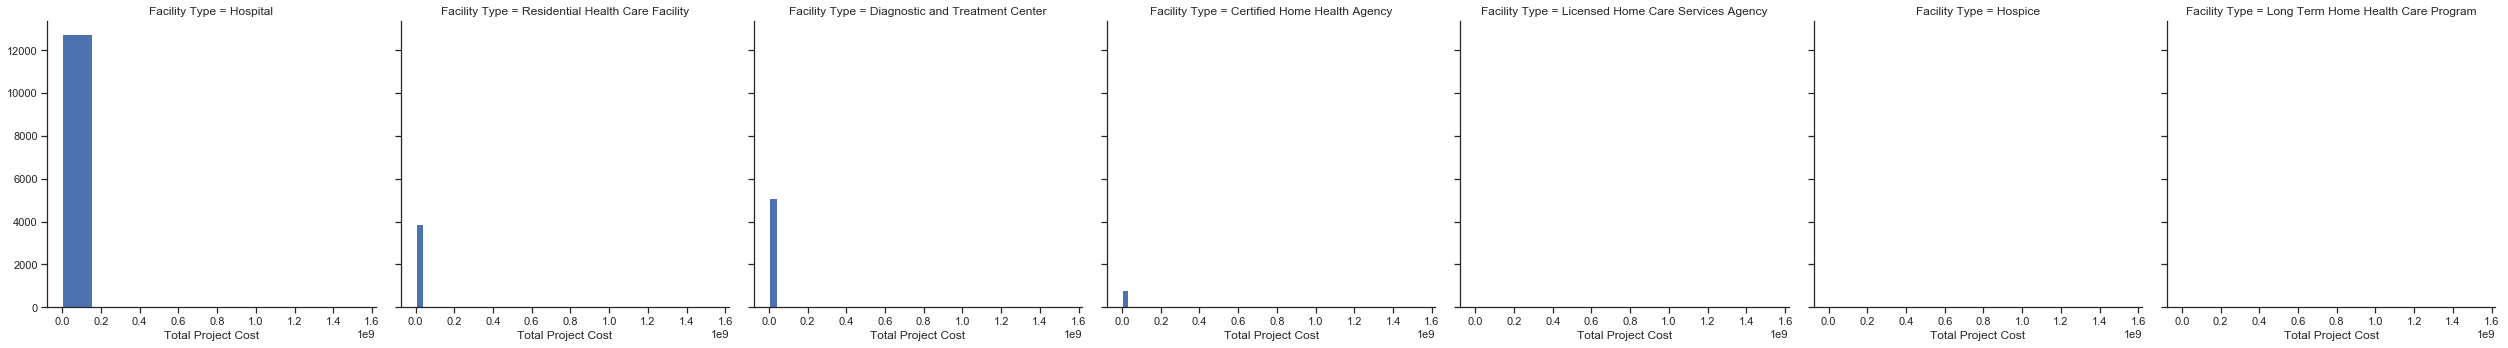

In [11]:
sns.set(style='ticks')
g = sns.FacetGrid(filtered_data, col='Facility Type',height=5, aspect=1)
g.map(plt.hist,'Total Project Cost');

## 6- Stratify the plot you developed by year

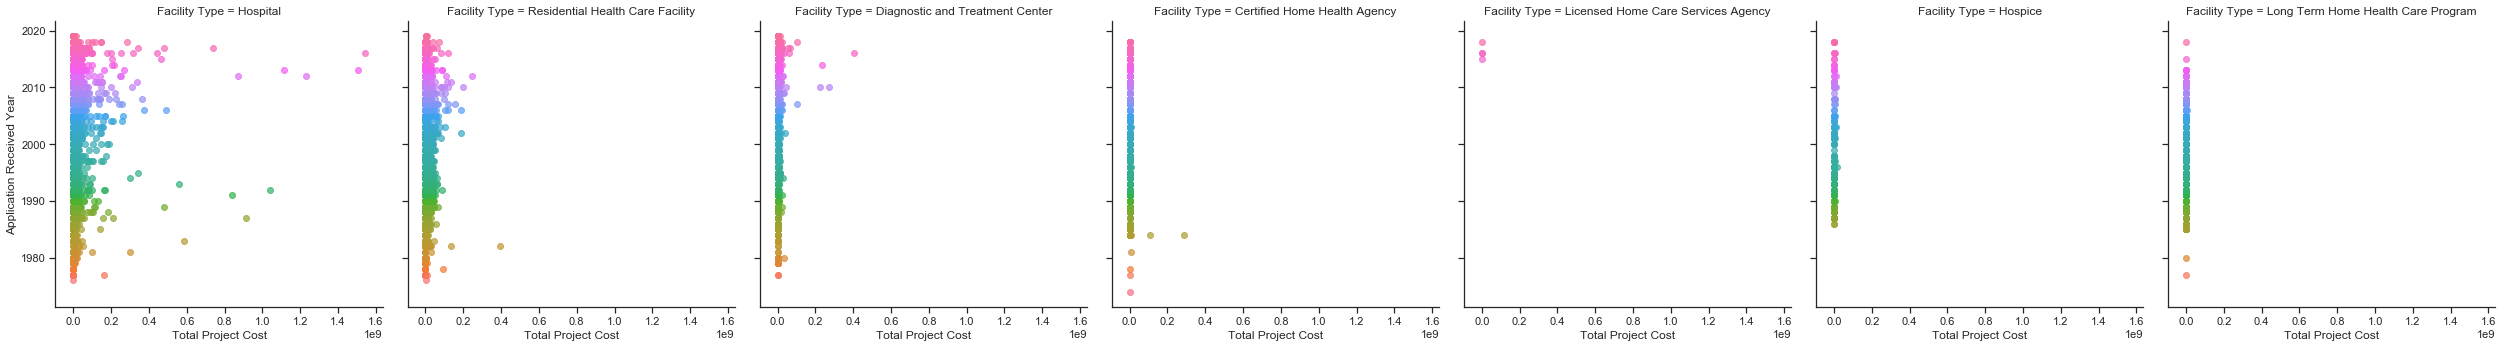

In [12]:
g = sns.FacetGrid(filtered_data, col="Facility Type",hue='Application Received Year',height=5,aspect=1)
g.map(plt.scatter, 'Total Project Cost','Application Received Year',alpha=.7);

## 7- Develop an informative visual plot of your choice

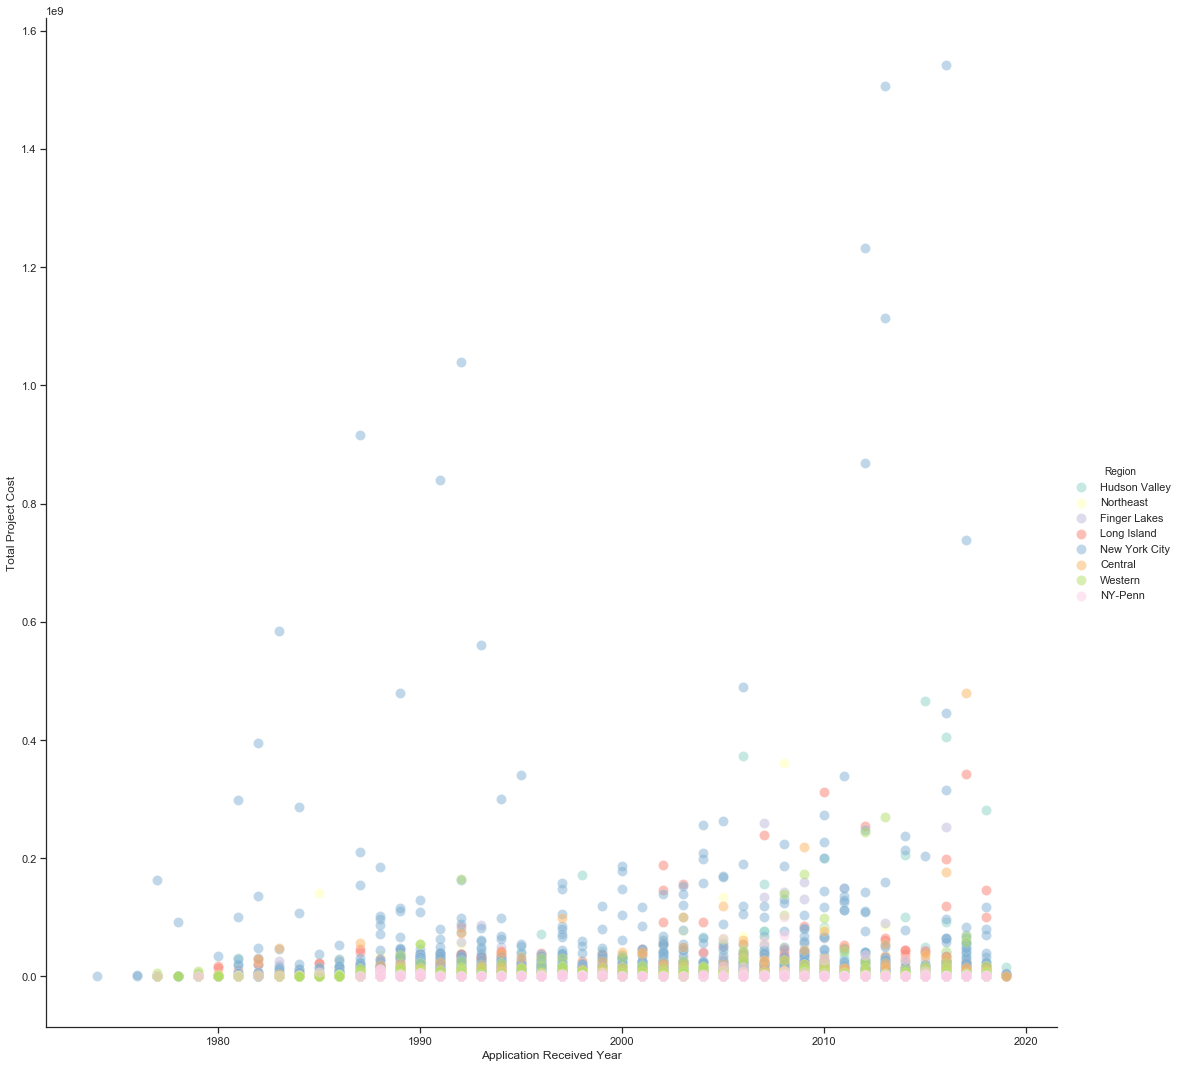

In [66]:
#Total Project Cost mapped out by year with Regional color 
a = sns.FacetGrid(filtered_data,hue="Region", palette="Set3", height=15)
a.map(plt.scatter, "Application Received Year","Total Project Cost", s=100, linewidth=.2, edgecolor='white',alpha=.5)
a.add_legend();

## 8-Finding:

In [ ]:
#The total cost grows with year, the growing steps varies.
#New York City has the biggest step also the largest project cost.

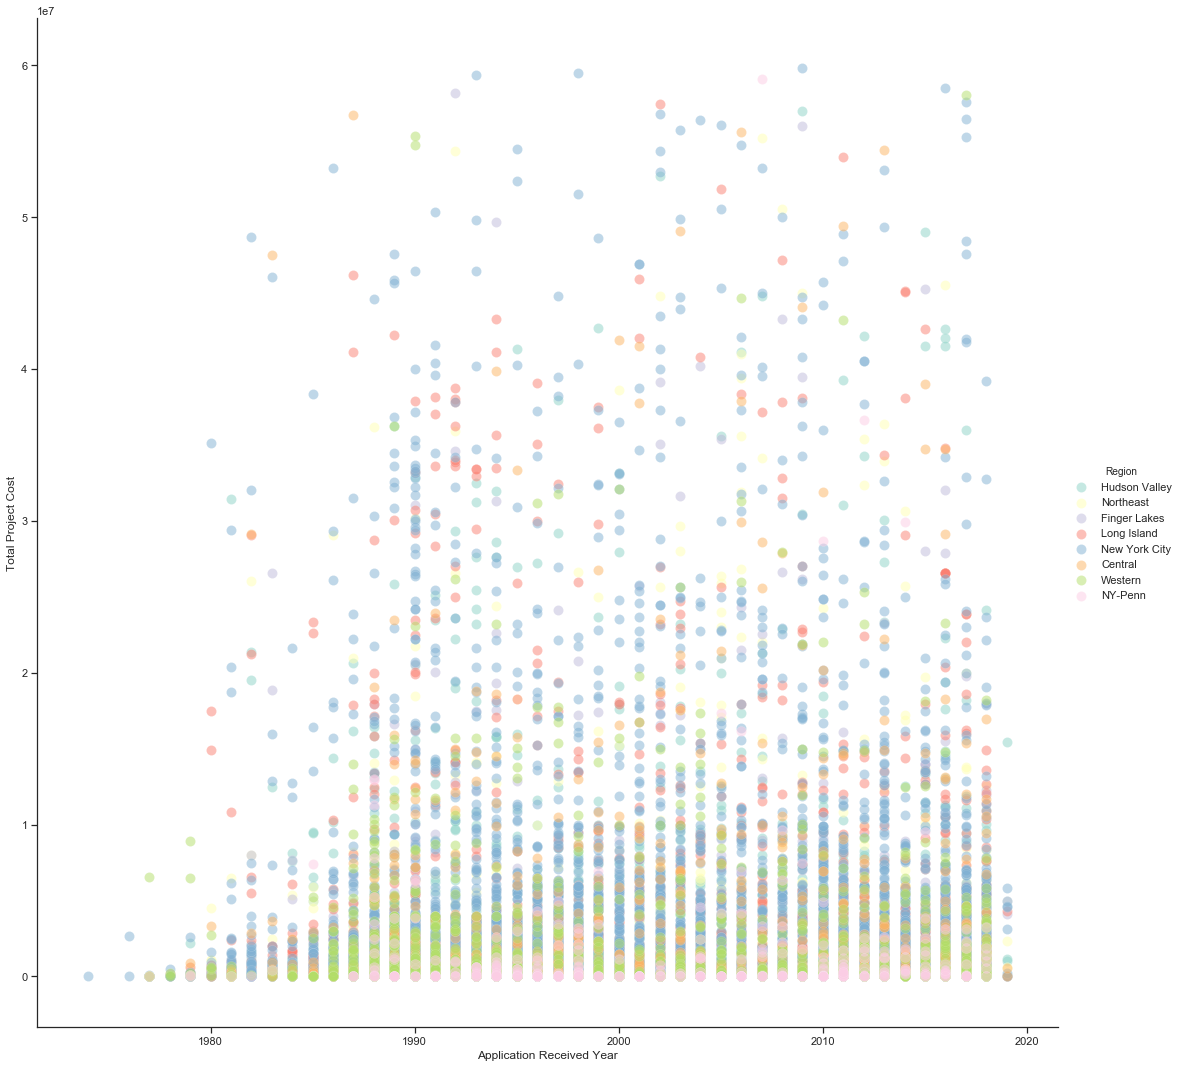

In [72]:
filter_NY=filtered_data['Total Project Cost']<60000000
filtered_NY=filtered_data[filter_NY]
#Total Project Cost mapped out by year with Regional color 
a = sns.FacetGrid(filtered_NY,hue="Region", palette="Set3", height=15)
a.map(plt.scatter, "Application Received Year","Total Project Cost", s=100, linewidth=.2, edgecolor='white',alpha=.5)
a.add_legend();

## 8- Findings

In [ ]:
#The whole amount of project have a scale less than 50000000 reached it's peak around 1990.
#New York City carries the most of the projects quite consistantly, no matter big or small.

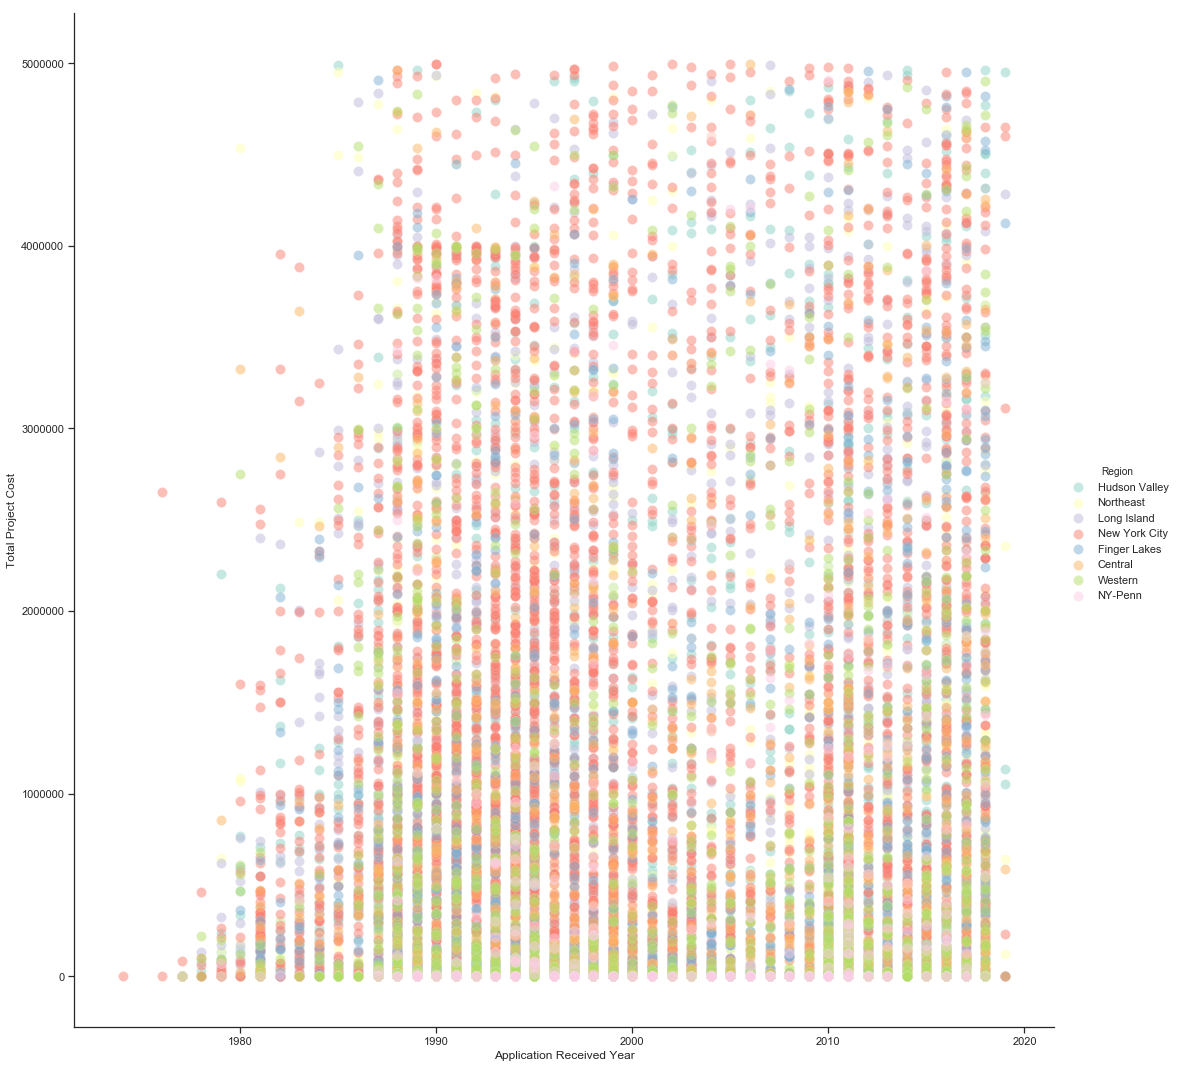

In [71]:
filter_NY=filtered_data['Total Project Cost']<5000000
filtered_NY=filtered_data[filter_NY]
#Total Project Cost mapped out by year with Regional color 
a = sns.FacetGrid(filtered_NY,hue="Region", palette="Set3", height=15)
a.map(plt.scatter, "Application Received Year","Total Project Cost", s=100, linewidth=.2, edgecolor='white',alpha=.5)
a.add_legend();

## 8- Findings

In [ ]:
#NY-Penn and Western area carrys most of the small scale projects.
#They are slowly increasing their project scale and leaving the small project to other areas.
#Competition is intense, facilities are about the same project cost.